In [1]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
import seaborn as sns
from scipy.stats.mstats import winsorize
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

pd.options.display.float_format= '{:.3f}'.format

## Context
I'm a crowdfunding enthusiast and i'm watching kickstarter since its early days. Right now I just collect data and the only app i've made is this twitter bot which tweet any project reaching some milestone: @bloomwatcher . I have a lot of other ideas, but sadly not enough time to develop them… But I hope you can!

## Content
You'll find most useful data for project analysis. Columns are self explanatory except:

usd_pledged: conversion in US dollars of the pledged column (conversion done by kickstarter).

usd pledge real: conversion in US dollars of the pledged column (conversion from Fixer.io API).

usd goal real: conversion in US dollars of the goal column (conversion from Fixer.io API).

## Acknowledgements
Data are collected from Kickstarter Platform

usd conversion (usdpledgedreal and usdgoalreal columns) were generated from convert ks pledges to usd script done by tonyplaysguitar

# Explain Columns of Kickstarter Projects

- ID: internal kickstarter id
- name: name of project - A project is a finite work with a clear goal that you’d like to bring to life. Think albums, books, or films.
- category: category
- main_category: category of campaign
- currency: currency used to support
- deadline: deadline for crowdfunding
- goal: fundraising goal The funding goal is the amount of money that a creator needs to complete their project.
- launched: date launched
- pledged: amount pledged by "crowd"
- state: Current condition the project is in
- backers: number of backers
- country: country pledged from
- usd pledged: amount of money pledged

## Questions

- Under what conditions an initiative was successful (main question)
- Investors donated to which category most
- Which year has the most investment 
- Which category has been the most successful
- Which year is the number of successful ventures
- How many of the startup have received the investment they targeted 
- How many ventures were successful despite collecting the money he had targeted or not targeted
- how many ventures failed despite collecting the money he was aiming  
- Which country got the most investment
- which country has a higher success rate than others


In [2]:
starts= pd.read_csv('ks-projects-201801.csv')
starts.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.000,2015-08-11 12:12:28,0.000,failed,0,GB,0.000,0.000,1533.950
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.000,2017-09-02 04:43:57,2421.000,failed,15,US,100.000,2421.000,30000.000
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.000,2013-01-12 00:20:50,220.000,failed,3,US,220.000,220.000,45000.000
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.000,2012-03-17 03:24:11,1.000,failed,1,US,1.000,1.000,5000.000
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.000,2015-07-04 08:35:03,1283.000,canceled,14,US,1283.000,1283.000,19500.000


### Data Recognition

In [4]:
starts.isnull().sum()*100/starts.shape[0]

ID                 0.000
name               0.001
category           0.000
main_category      0.000
currency           0.000
deadline           0.000
goal               0.000
launched           0.000
pledged            0.000
state              0.000
backers            0.000
country            0.000
usd pledged        1.003
usd_pledged_real   0.000
usd_goal_real      0.000
dtype: float64

In [5]:
starts.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')

In [6]:
starts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [8]:
starts.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,378661.000,1074731191.989,619086204.323,5971.000,538263516.000,1075275634.000,1610148624.000,2147476221.000
goal,378661.000,49080.792,1183391.259,0.010,2000.000,5200.000,16000.000,100000000.000
pledged,378661.000,9682.979,95636.010,0.000,30.000,620.000,4076.000,20338986.270
backers,378661.000,105.617,907.185,0.000,2.000,12.000,56.000,219382.000
usd pledged,374864.000,7036.729,78639.745,0.000,16.980,394.720,3034.090,20338986.270
usd_pledged_real,378661.000,9058.924,90973.343,0.000,31.000,624.330,4050.000,20338986.270
usd_goal_real,378661.000,45454.401,1152950.055,0.010,2000.000,5500.000,15500.000,166361390.710


In [9]:
starts['goal'].unique()

array([  1000.,  30000.,  45000., ..., 186037.,  33975.,  28559.])

In [10]:
starts['usd pledged'].unique()

array([   0.  ,  100.  ,  220.  , ..., 1732.02, 5019.92, 2698.97])

## Filling Missing Values 

In [11]:
starts['usd pledged'].fillna(starts['usd_pledged_real'], inplace=True)

In [12]:
starts.isnull().sum()*100/starts.shape[0]

ID                 0.000
name               0.001
category           0.000
main_category      0.000
currency           0.000
deadline           0.000
goal               0.000
launched           0.000
pledged            0.000
state              0.000
backers            0.000
country            0.000
usd pledged        0.000
usd_pledged_real   0.000
usd_goal_real      0.000
dtype: float64

In [66]:
# Check missing values in the column "name"
starts[pd.isnull(starts['name'])].index

Int64Index([166851, 307234, 309991, 338931], dtype='int64')

In [67]:
starts[starts.index == 166851]
starts[starts.index == 307234]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
307234,634871725,NaN,Video Games,Games,GBP,2013-01-06,2000.000,2012-12-19 23:57:48,196.000,failed,12,GB,317.730,316.050,3224.970


In [68]:
starts['name'].unique()

array(['The Songs of Adelaide & Abullah',
       'Greeting From Earth: ZGAC Arts Capsule For ET', 'Where is Hank?',
       ...,
       'Walls of Remedy- New lesbian Romantic Comedy feature unlike any other!!',
       'BioDefense Education Kit', 'Nou Renmen Ayiti!  We Love Haiti!'],
      dtype=object)

In [69]:
starts.shape

(378661, 15)

In [14]:
# we have a lot data so we can delete mising value of name feature but we fill with 'unknown'
starts['name'].fillna('unknown',inplace=True)

In [15]:
starts.isnull().sum()*100/starts.shape[0] # our data has correct values and no missing values.

ID                 0.000
name               0.000
category           0.000
main_category      0.000
currency           0.000
deadline           0.000
goal               0.000
launched           0.000
pledged            0.000
state              0.000
backers            0.000
country            0.000
usd pledged        0.000
usd_pledged_real   0.000
usd_goal_real      0.000
dtype: float64

In [16]:
starts.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.000,2015-08-11 12:12:28,0.000,failed,0,GB,0.000,0.000,1533.950
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.000,2017-09-02 04:43:57,2421.000,failed,15,US,100.000,2421.000,30000.000
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.000,2013-01-12 00:20:50,220.000,failed,3,US,220.000,220.000,45000.000
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.000,2012-03-17 03:24:11,1.000,failed,1,US,1.000,1.000,5000.000
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.000,2015-07-04 08:35:03,1283.000,canceled,14,US,1283.000,1283.000,19500.000


# Outlier values

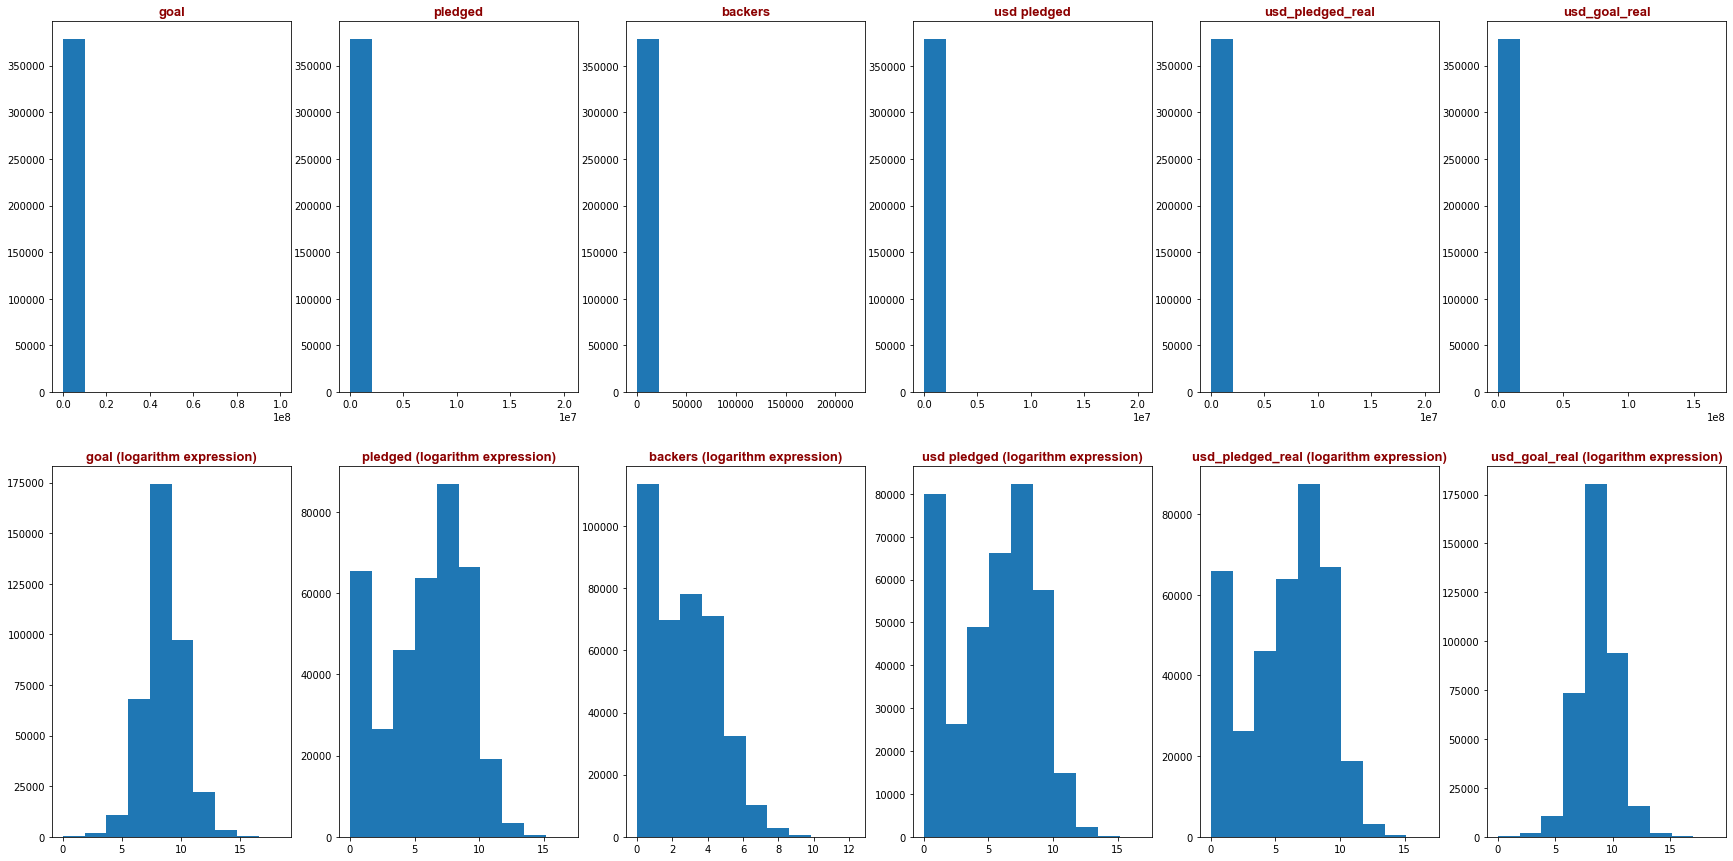

In [17]:
plt.figure(figsize=(30,15))
title_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
curve_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

variables = ['goal', 'pledged' , 'backers',"usd pledged","usd_pledged_real","usd_goal_real"]

for i in range(6):
    plt.subplot(2, 6, i+1)
    plt.hist(starts[variables[i]])
    plt.title(variables[i], fontdict=title_font)
    
for i in range(6):
    plt.subplot(2, 6, i+7)
    plt.hist(np.log(starts[variables[i]]+1))
    plt.title(variables[i] + ' (logarithm expression)', fontdict=title_font)

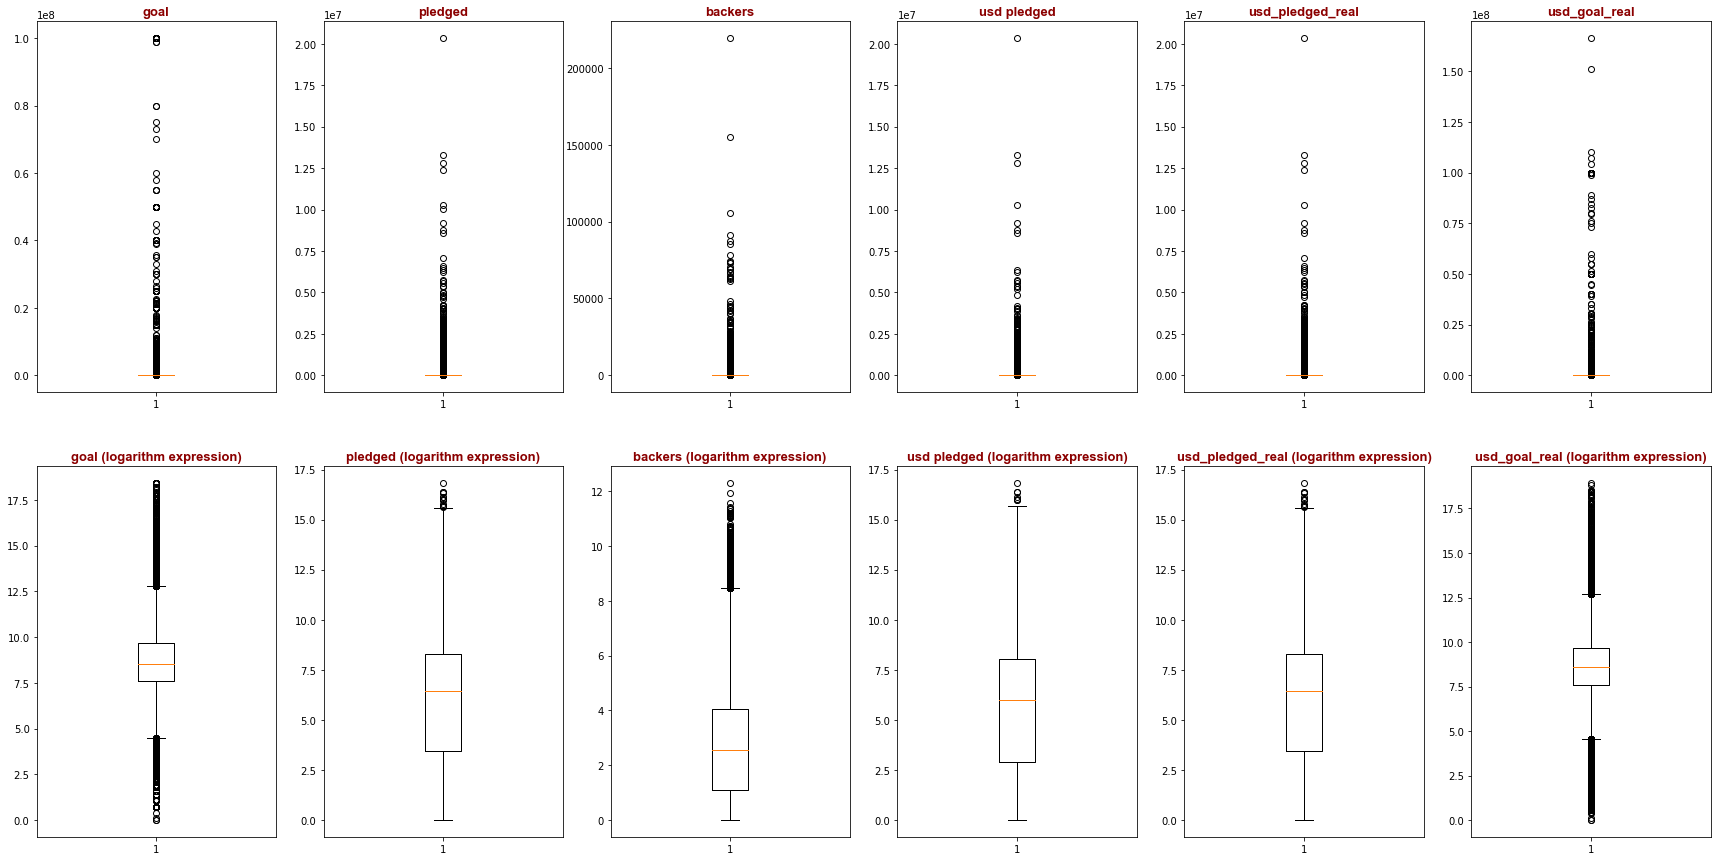

In [18]:
plt.figure(figsize=(30,15))
title_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
curve_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

variables = ['goal', 'pledged' , 'backers',"usd pledged","usd_pledged_real","usd_goal_real"]

for i in range(6):
    plt.subplot(2, 6, i+1)
    plt.boxplot(starts[variables[i]])
    plt.title(variables[i], fontdict=title_font)
    
for i in range(6):
    plt.subplot(2, 6, i+7)
    plt.boxplot(np.log(starts[variables[i]]+1))
    plt.title(variables[i] + ' (logarithm expression)', fontdict=title_font)

We implement IQR MEthod because we will learning how much has data outliner values.

In [19]:
# IQR Method 

q75,q25= np.percentile(starts['goal'],[75,25])
caa= q75-q25

In [20]:
threshold_variables=[]
for threshold_worth in np.arange(1,5):
    min_worth=q25 - (caa*threshold_worth)
    max_worth=q75 + (caa*threshold_worth)
    
    number_of_outliers=len((np.where((starts['goal']>max_worth) | (starts['goal']<min_worth))[0]))
    threshold_variables.append((threshold_worth,number_of_outliers))
threshold_variables

[(1, 52172), (2, 41784), (3, 28166), (4, 23545)]

In [21]:
log_threshold_variables= pd.DataFrame()
variables = ['goal', 'pledged' , 'backers',"usd pledged","usd_pledged_real","usd_goal_real"]
for j in variables:
    for threshold_worth in np.arange(1,5,1):
        q75_log, q25_log = np.percentile(np.log(starts[j]), [75 ,25])
        caa_log = q75_log - q25_log
        q75, q25 = np.percentile(starts[j], [75 ,25])
        caa= q75 - q25
        min_worth_log = q25_log - (caa_log*threshold_worth) 
        max_worth_log = q75_log + (caa_log*threshold_worth)
        min_worth= q25 - (caa*threshold_worth) #logarithm expression
        max_worth = q75 + (caa*threshold_worth) #logarithm expression
        number_of_outliers_log = len((np.where((np.log(starts[j]) > max_worth_log)| 
                                               (np.log(starts[j]) < min_worth_log))[0]))
        number_of_outliers = len((np.where((starts[j] > max_worth)| 
                                               (starts[j] < min_worth))[0]))
        log_threshold_variables = log_threshold_variables.append({'threshold_worth': threshold_worth,
                                                            'number_of_outliers' : number_of_outliers, #logarithm expression
                                                            'number_of_outliers_log': number_of_outliers_log 
                                                            }, ignore_index=True)
    print("-"*10,"",j,"-"*10)
    display(log_threshold_variables)
    log_threshold_variables = pd.DataFrame()

----------  goal ----------


,number_of_outliers,number_of_outliers_log,threshold_worth
0,52172.000,22697.000,1.000
1,41784.000,3582.000,2.000
2,28166.000,700.000,3.000
3,23545.000,46.000,4.000


----------  pledged ----------


,number_of_outliers,number_of_outliers_log,threshold_worth
0,59490.000,53251.000,1.000
1,42702.000,52527.000,2.000
2,33112.000,52527.000,3.000
3,27613.000,52527.000,4.000


----------  backers ----------


,number_of_outliers,number_of_outliers_log,threshold_worth
0,55141.000,59197.000,1.000
1,38255.000,55633.000,2.000
2,29013.000,55609.000,3.000
3,23258.000,55609.000,4.000


----------  usd pledged ----------


,number_of_outliers,number_of_outliers_log,threshold_worth
0,59985.000,69256.000,1.000
1,44337.000,68830.000,2.000
2,33973.000,68830.000,3.000
3,27991.000,68830.000,4.000


----------  usd_pledged_real ----------


,number_of_outliers,number_of_outliers_log,threshold_worth
0,59139.000,53190.000,1.000
1,42158.000,52527.000,2.000
2,32535.000,52527.000,3.000
3,26846.000,52527.000,4.000


----------  usd_goal_real ----------


,number_of_outliers,number_of_outliers_log,threshold_worth
0,57848.000,23703.000,1.000
1,39758.000,3842.000,2.000
2,26943.000,724.000,3.000
3,22752.000,47.000,4.000


We control the standard deviation distance that it will give to the column recognition, we will find out how much we need to keep our threshold high.

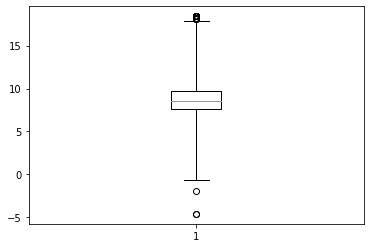

In [22]:
plt.boxplot(np.log(starts['goal']),whis=4)
plt.show()

In [79]:
# starts['success_pleged_ration']= (starts['pledged']*100)/starts['goal']

In [23]:
starts.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.000,2015-08-11 12:12:28,0.000,failed,0,GB,0.000,0.000,1533.950
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.000,2017-09-02 04:43:57,2421.000,failed,15,US,100.000,2421.000,30000.000
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.000,2013-01-12 00:20:50,220.000,failed,3,US,220.000,220.000,45000.000
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.000,2012-03-17 03:24:11,1.000,failed,1,US,1.000,1.000,5000.000
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.000,2015-07-04 08:35:03,1283.000,canceled,14,US,1283.000,1283.000,19500.000


### Summary
- We have examined how distributions of continuous variables are. We are not dealing with 'backers' here, because having realistic values. This situaiton will make easier our job.
- We observed that columns of logistic expressions that they close to normal distribution, but the despite of  logarithmic expression of 'goal', which is one of our target variables, it contains that too much number of outliner values.
- We will apply winsorized to the logarithmic expression of the 'goal' variable.
- and then we will create a new column that called 'succes_pledged_ration'.

In [24]:
starts_2= starts.copy()

In [25]:
starts_2['goal']= np.log(starts_2['goal'])
starts_2['pledged']= np.log(starts_2['pledged']+1) # we have 0.. if there is 0 log will write -inf
starts_2['usd pledged']= np.log(starts_2['usd pledged']+1)  
starts_2['usd_pledged_real']=np.log(starts_2['usd_pledged_real']+1) 
starts_2['usd_goal_real']= np.log(starts_2['usd_goal_real'])

In [27]:
np.log(starts_2['goal']).isnull().index # There is no empty value 

RangeIndex(start=0, stop=378661, step=1)

In [28]:
starts_2['pledged']

0        0.000
1        7.792
2        5.398
3        0.693
4        7.158
          ... 
378656   3.258
378657   5.050
378658   3.045
378659   5.303
378660   6.263
Name: pledged, Length: 378661, dtype: float64

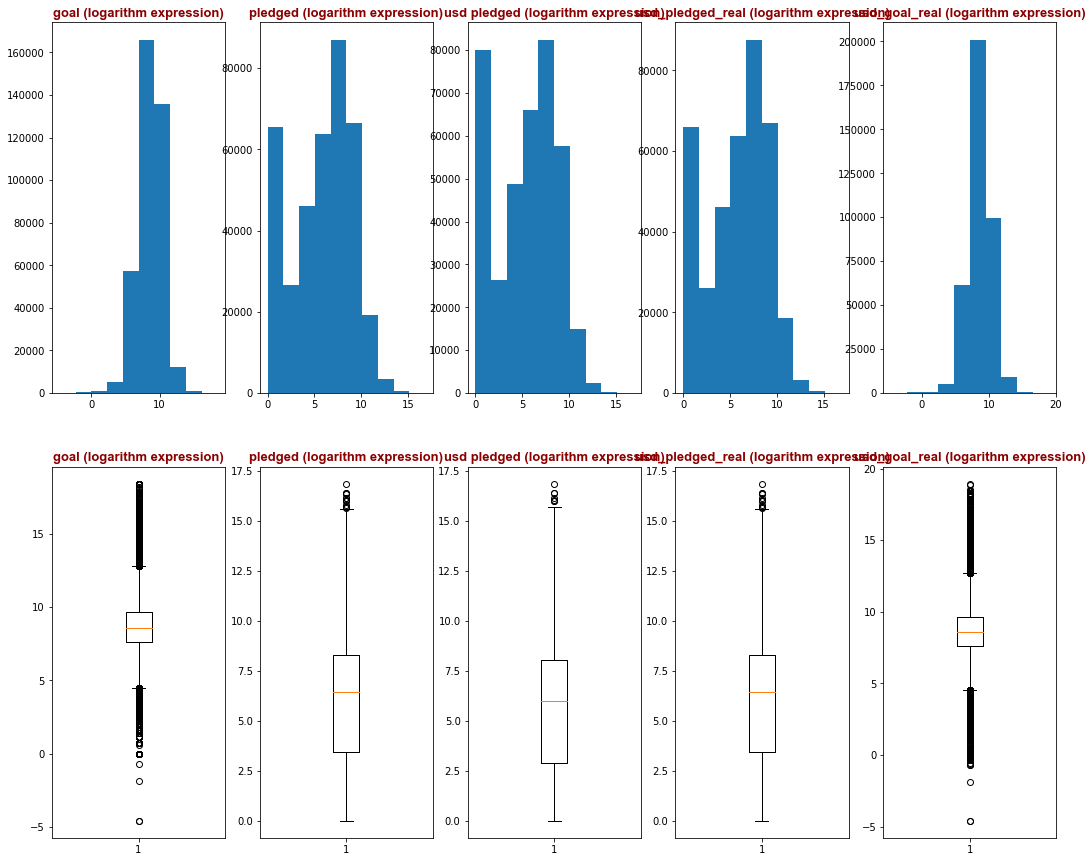

In [29]:
plt.figure(figsize=(18,15))
log_columns=['goal','pledged','usd pledged','usd_pledged_real','usd_goal_real']
    
for i in range(5):
    plt.subplot(2, 5, i+1)
    plt.hist(starts_2[log_columns[i]])
    plt.title(log_columns[i] + ' (logarithm expression)', fontdict=title_font)
for i in range(5):
    plt.subplot(2, 5, i+6)
    plt.boxplot(starts_2[log_columns[i]])
    plt.title(log_columns[i] + ' (logarithm expression)', fontdict=title_font)

In [30]:
from scipy.stats.mstats import winsorize
#winsorize_goruntulenme = winsorize(starts_2["goal"], (0.00010, 0.0005))
winsorize_starts = winsorize(starts_2["goal"], (0.01, 0.01))

winsorize_starts

masked_array(data=[ 6.90775528, 10.30895266, 10.71441777, ...,
                    9.61580548,  9.61580548,  7.60090246],
             mask=False,
       fill_value=1e+20)

{'whiskers': [<matplotlib.lines.Line2D at 0x1bcb095a148>,
 'caps': [<matplotlib.lines.Line2D at 0x1bcb099da88>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bcb0991c48>],
 'medians': [<matplotlib.lines.Line2D at 0x1bcb07c2ec8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bcb074bd48>],
 'means': []}

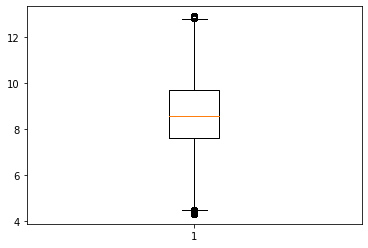

In [31]:
plt.boxplot(winsorize_starts )

(array([ 8305., 12028., 26317., 56758., 86588., 75569., 60949., 28550.,
        14634.,  8963.]),
 array([ 4.31748811,  5.17566128,  6.03383446,  6.89200763,  7.7501808 ,
         8.60835397,  9.46652714, 10.32470031, 11.18287348, 12.04104665,
        12.89921983]),
 <a list of 10 Patch objects>)

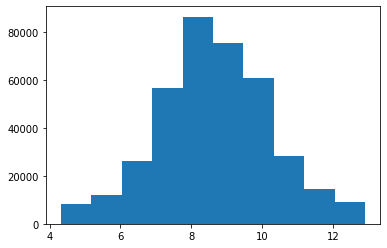

In [32]:
plt.hist(winsorize_starts)

In [33]:
starts_2['goal']=winsorize(starts_2["goal"], (0.01, 0.01))
starts_2['usd_goal_real']=winsorize(starts_2["usd_goal_real"], (0.01, 0.01))

{'whiskers': [<matplotlib.lines.Line2D at 0x1bcb0c5efc8>,
 'caps': [<matplotlib.lines.Line2D at 0x1bcb0cb1a08>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bcb0c23788>],
 'medians': [<matplotlib.lines.Line2D at 0x1bcb0562dc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bcb05d4808>],
 'means': []}

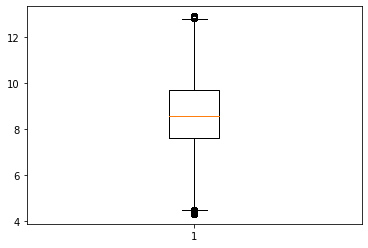

In [34]:
plt.boxplot(starts_2['goal'])

(array([ 8305., 12028., 26317., 56758., 86588., 75569., 60949., 28550.,
        14634.,  8963.]),
 array([ 4.31748811,  5.17566128,  6.03383446,  6.89200763,  7.7501808 ,
         8.60835397,  9.46652714, 10.32470031, 11.18287348, 12.04104665,
        12.89921983]),
 <a list of 10 Patch objects>)

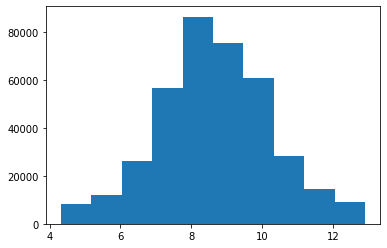

In [35]:
plt.hist(starts_2['goal'])

### Let's apply the 'jarque bera' and 'normal test' methods to statistically prove whether our variables are normally distributed.

In [36]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

pd.options.display.float_format = '{:.5f}'.format

columns = ["goal", "pledged", "usd pledged","usd_pledged_real","usd_goal_real"]
dispersion_tests = pd.DataFrame(columns=['column', 'jarque_bera_stats', 'jarque_bera_p_value', 
                                         'normal_stats', 'normal_p_value'])

for column in columns:
    jb_stats = jarque_bera(starts_2[column])
    norm_stats = normaltest(starts_2[column])
    dispersion_tests = dispersion_tests.append({"column": column,
                                                "jarque_bera_stats" : jb_stats[0] ,
                                                "jarque_bera_p_value" : jb_stats[1] ,
                                                "normal_stats": norm_stats[0] , 
                                                "normal_p_value" : norm_stats[1]
                                               }, ignore_index=True)
dispersion_tests

,column,jarque_bera_stats,jarque_bera_p_value,normal_stats,normal_p_value
0,goal,207.45786,0.00000,202.56986,0.00000
1,pledged,20771.79666,0.00000,44804.48053,0.00000
2,usd pledged,21919.76947,0.00000,95660.29753,0.00000
3,usd_pledged_real,21490.19489,0.00000,46191.14992,0.00000
4,usd_goal_real,433.96575,0.00000,429.21546,0.00000


As it seems, the variables are not normally distributed because the p value is 0. let's see, is there any outlier value?

In [39]:
log_threshold_variables= pd.DataFrame()
variables = ['goal', 'pledged' , 'backers',"usd pledged","usd_pledged_real","usd_goal_real"]
for j in variables:
    for threshold_worth in np.arange(1,5,1):
        q75_log, q25_log = np.percentile(np.log(starts_2[j]), [75 ,25])
        caa_log = q75_log - q25_log
        q75, q25 = np.percentile(starts_2[j], [75 ,25])
        caa= q75 - q25
        min_worth_log = q25_log - (caa_log*threshold_worth) 
        max_worth_log = q75_log + (caa_log*threshold_worth)
        min_worth= q25 - (caa*threshold_worth) #logarithm expression
        max_worth = q75 + (caa*threshold_worth) #logarithm expression
        number_of_outliers_log = len((np.where((np.log(starts_2[j]) > max_worth_log)| 
                                               (np.log(starts_2[j]) < min_worth_log))[0]))
        number_of_outliers = len((np.where((starts_2[j] > max_worth)| 
                                               (starts_2[j] < min_worth))[0]))
        log_threshold_variables = log_threshold_variables.append({'threshold_worth': threshold_worth,
                                                            'number_of_outliers' : number_of_outliers, #logarithm expression
                                                            'number_of_outliers_log': number_of_outliers_log 
                                                            }, ignore_index=True)
    print("-"*10,"",j,"-"*10)
    display(log_threshold_variables)
    log_threshold_variables = pd.DataFrame()

----------  goal ----------


,number_of_outliers,number_of_outliers_log,threshold_worth
0,22697.00000,25168.00000,1.00000
1,0.00000,6680.00000,2.00000
2,0.00000,0.00000,3.00000
3,0.00000,0.00000,4.00000


----------  pledged ----------


,number_of_outliers,number_of_outliers_log,threshold_worth
0,752.00000,65141.00000,1.00000
1,0.00000,52527.00000,2.00000
2,0.00000,52527.00000,3.00000
3,0.00000,52527.00000,4.00000


----------  backers ----------


,number_of_outliers,number_of_outliers_log,threshold_worth
0,55141.00000,59197.00000,1.00000
1,38255.00000,55633.00000,2.00000
2,29013.00000,55609.00000,3.00000
3,23258.00000,55609.00000,4.00000


----------  usd pledged ----------


,number_of_outliers,number_of_outliers_log,threshold_worth
0,462.00000,76734.00000,1.00000
1,0.00000,68830.00000,2.00000
2,0.00000,68830.00000,3.00000
3,0.00000,68830.00000,4.00000


----------  usd_pledged_real ----------


,number_of_outliers,number_of_outliers_log,threshold_worth
0,684.00000,65318.00000,1.00000
1,0.00000,53326.00000,2.00000
2,0.00000,52527.00000,3.00000
3,0.00000,52527.00000,4.00000


----------  usd_goal_real ----------


,number_of_outliers,number_of_outliers_log,threshold_worth
0,23703.00000,24563.00000,1.00000
1,0.00000,6313.00000,2.00000
2,0.00000,0.00000,3.00000
3,0.00000,0.00000,4.00000


#### As can be seen, we apply the goal variable both logarithm and winsorized, and we remove almost 'goal' of outliers. we also made it closer to normal distribution.

In [39]:
starts_2.to_csv('Winsorize_log_starts',encoding='utf-8')

### Now let's normalize all our variables and examine their distributions.

In [40]:
starts.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.00000,2015-08-11 12:12:28,0.00000,failed,0,GB,0.00000,0.00000,1533.95000
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.00000,2017-09-02 04:43:57,2421.00000,failed,15,US,100.00000,2421.00000,30000.00000
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.00000,2013-01-12 00:20:50,220.00000,failed,3,US,220.00000,220.00000,45000.00000
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.00000,2012-03-17 03:24:11,1.00000,failed,1,US,1.00000,1.00000,5000.00000
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.00000,2015-07-04 08:35:03,1283.00000,canceled,14,US,1283.00000,1283.00000,19500.00000


In [41]:
starts.isnull().sum()*100/starts.shape[0]

ID                 0.00000
name               0.00000
category           0.00000
main_category      0.00000
currency           0.00000
deadline           0.00000
goal               0.00000
launched           0.00000
pledged            0.00000
state              0.00000
backers            0.00000
country            0.00000
usd pledged        0.00000
usd_pledged_real   0.00000
usd_goal_real      0.00000
dtype: float64

In [42]:
from sklearn.preprocessing import normalize

starts["norm_goal"] = normalize(np.array(starts["goal"]).reshape(1,-1)).reshape(-1,1)
starts["norm_pledged"] = normalize(np.array(starts["pledged"]).reshape(1,-1)).reshape(-1,1)
#starts["norm_usd_pledged"] = normalize(np.array(starts["usd pledged"]).reshape(1,-1)).reshape(-1,1)
starts["norm_usd_pledged_real"] = normalize(np.array(starts["usd_pledged_real"]).reshape(1,-1)).reshape(-1,1)
starts["norm_usd_goal_real"] = normalize(np.array(starts["usd_goal_real"]).reshape(1,-1)).reshape(-1,1)

normal_ozellikler=["goal","norm_goal","pledged","norm_pledged",
                    "usd_pledged_real","norm_usd_pledged_real","usd_goal_real","norm_usd_goal_real"]


print('Minimum Worths\n-----------------',)
print(starts[normal_ozellikler].min())
print('\nMaksimum Worths\n-----------------',)
print(starts[normal_ozellikler].max())

Minimum Worths
-----------------
goal                    0.01000
norm_goal               0.00000
pledged                 0.00000
norm_pledged            0.00000
usd_pledged_real        0.00000
norm_usd_pledged_real   0.00000
usd_goal_real           0.01000
norm_usd_goal_real      0.00000
dtype: float64

Maksimum Worths
-----------------
goal                    100000000.00000
norm_goal                       0.13721
pledged                  20338986.27000
norm_pledged                    0.34385
usd_pledged_real         20338986.27000
norm_usd_pledged_real           0.36153
usd_goal_real           166361390.71000
norm_usd_goal_real              0.23430
dtype: float64


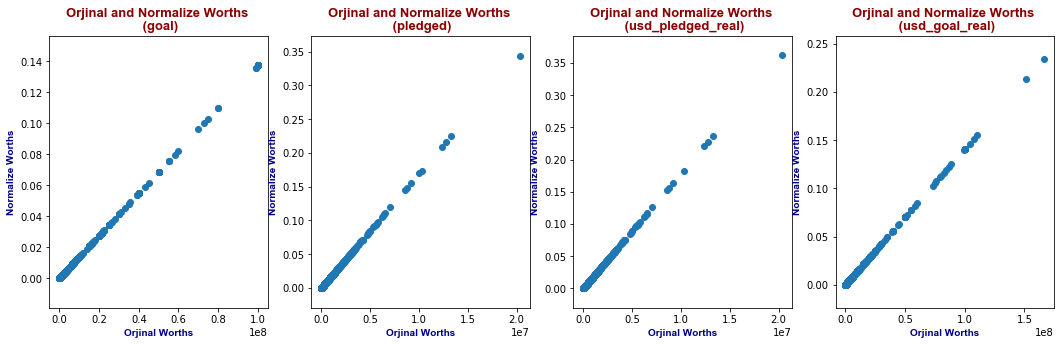

In [43]:
plt.figure(figsize=(18,5))

for i in range(4):
    plt.subplot(1,4,i+1)
    plt.scatter(starts[normal_ozellikler[2*i]], starts[normal_ozellikler[2*i+1]])
    plt.title("Orjinal and Normalize Worths \n ({})".format(normal_ozellikler[2*i]), fontdict=title_font)
    plt.xlabel("Orjinal Worths", fontdict=curve_font)
    plt.ylabel("Normalize Worths", fontdict=curve_font)

plt.show()

#### As it seems, the number of our outliers has decreased to a few. Now we can use winsorize here.

(array([227628.,  60789.,  28956.,  14420.,   6676.,  10698.,   3723.,
          2226.,   3590.,  19955.]),
 array([1.37206195e-11, 1.23485699e-05, 2.46971261e-05, 3.70456823e-05,
        4.93942385e-05, 6.17427947e-05, 7.40913510e-05, 8.64399072e-05,
        9.87884634e-05, 1.11137020e-04, 1.23485576e-04]),
 <a list of 10 Patch objects>)

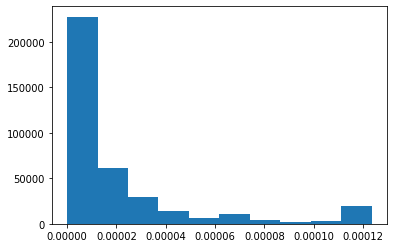

In [45]:
plt.hist(winsorize(starts['norm_goal'], (0,.05)))

(array([3.78507e+05, 4.40000e+01, 3.20000e+01, 1.40000e+01, 1.60000e+01,
        5.00000e+00, 1.00000e+00, 4.00000e+00, 0.00000e+00, 3.80000e+01]),
 array([1.37206195e-11, 1.37206195e-02, 2.74412391e-02, 4.11618586e-02,
        5.48824781e-02, 6.86030977e-02, 8.23237172e-02, 9.60443367e-02,
        1.09764956e-01, 1.23485576e-01, 1.37206195e-01]),
 <a list of 10 Patch objects>)

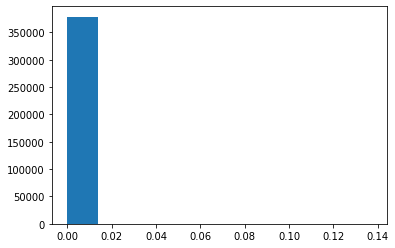

In [47]:
plt.hist(starts['norm_goal'])

### Yes, as can be seen, after the normalization process, our target variable has moved far from its normal distribution. Rather than working over this data, we will work with the data set whose logarithm statement has been taken and the target variable has been winsorized. This data set will provide convenience to us.

In [48]:
starts_2.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,6.90776,2015-08-11 12:12:28,0.00000,failed,0,GB,0.00000,0.00000,7.33560
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,10.30895,2017-09-02 04:43:57,7.79235,failed,15,US,4.61512,7.79235,10.30895
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,10.71442,2013-01-12 00:20:50,5.39816,failed,3,US,5.39816,5.39816,10.71442
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,8.51719,2012-03-17 03:24:11,0.69315,failed,1,US,0.69315,0.69315,8.51719
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,9.87817,2015-07-04 08:35:03,7.15774,canceled,14,US,7.15774,7.15774,9.87817


(array([ 8305., 12028., 26317., 56758., 86588., 75569., 60949., 28550.,
        14634.,  8963.]),
 array([ 4.31748811,  5.17566128,  6.03383446,  6.89200763,  7.7501808 ,
         8.60835397,  9.46652714, 10.32470031, 11.18287348, 12.04104665,
        12.89921983]),
 <a list of 10 Patch objects>)

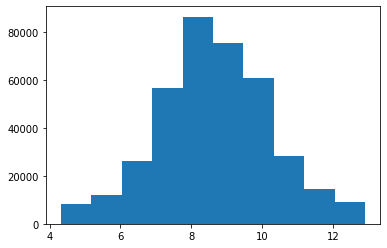

In [51]:
plt.hist(starts_2['goal'])

In [52]:
starts_2['success_pleged_ration']= (starts['pledged']*100)/starts['goal']

In [53]:
starts_2.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,success_pleged_ration
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,6.90776,2015-08-11 12:12:28,0.00000,failed,0,GB,0.00000,0.00000,7.33560,0.00000
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,10.30895,2017-09-02 04:43:57,7.79235,failed,15,US,4.61512,7.79235,10.30895,8.07000
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,10.71442,2013-01-12 00:20:50,5.39816,failed,3,US,5.39816,5.39816,10.71442,0.48889
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,8.51719,2012-03-17 03:24:11,0.69315,failed,1,US,0.69315,0.69315,8.51719,0.02000
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,9.87817,2015-07-04 08:35:03,7.15774,canceled,14,US,7.15774,7.15774,9.87817,6.57949


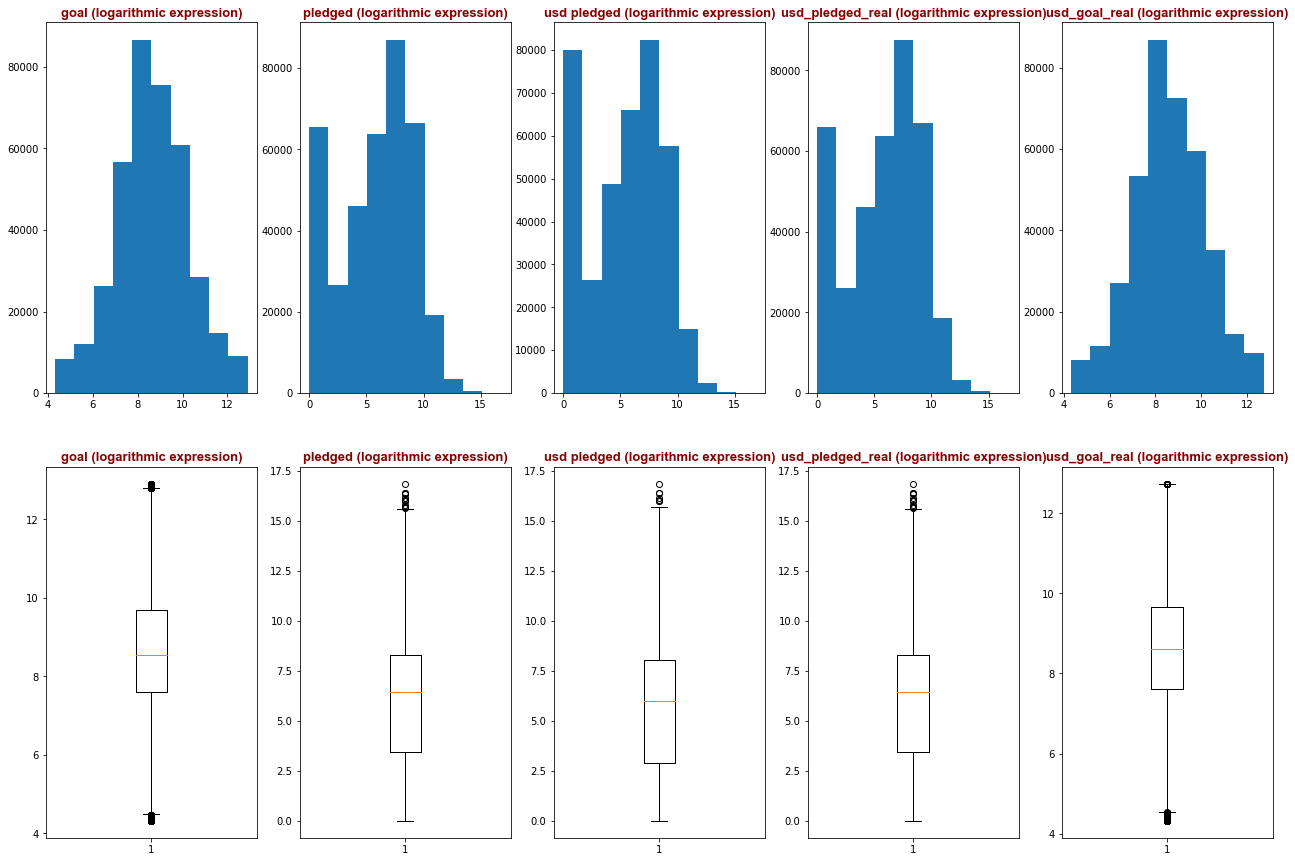

In [55]:
plt.figure(figsize=(22,15))
log_columns=['goal','pledged','usd pledged','usd_pledged_real','usd_goal_real','success_pleged_ration']
    
for i in range(5):
    plt.subplot(2, 5, i+1)
    plt.hist(starts_2[log_columns[i]])
    plt.title(log_columns[i] + ' (logarithmic expression)', fontdict=title_font)
for i in range(5):
    plt.subplot(2, 5, i+6)
    plt.boxplot(starts_2[log_columns[i]])
    plt.title(log_columns[i] + ' (logarithmic expression)', fontdict=title_font)

In [56]:
corr_starts_2=starts_2.corr()
display(corr_starts_2)

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,success_pleged_ration
ID,1.00000,-0.00109,-0.00127,0.00065,-0.00570,-0.00142,-0.00129,-0.00084
goal,-0.00109,1.00000,0.14642,0.08829,0.11993,0.13211,0.98070,-0.02462
pledged,-0.00127,0.14642,1.00000,0.18537,0.92398,0.99618,0.13905,0.01363
backers,0.00065,0.08829,0.18537,1.00000,0.17490,0.18614,0.08986,0.01661
usd pledged,-0.00570,0.11993,0.92398,0.17490,1.00000,0.93112,0.13433,0.01200
usd_pledged_real,-0.00142,0.13211,0.99618,0.18614,0.93112,1.00000,0.13997,0.01367
usd_goal_real,-0.00129,0.98070,0.13905,0.08986,0.13433,0.13997,1.00000,-0.02501
success_pleged_ration,-0.00084,-0.02462,0.01363,0.01661,0.01200,0.01367,-0.02501,1.00000


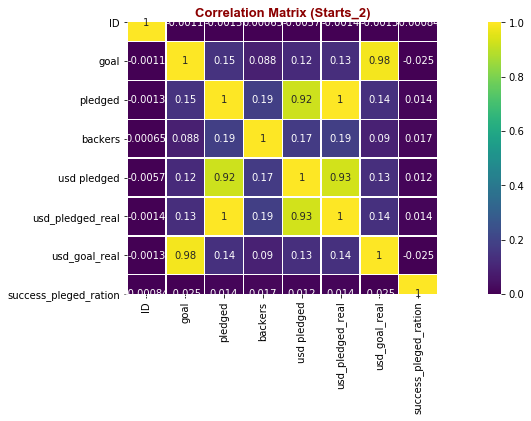

In [58]:
plt.figure(figsize=(18,5))
sns.heatmap(corr_starts_2, square=True, annot=True, linewidths=.5, vmin=0, vmax=1, cmap='viridis')
plt.title("Correlation Matrix (Starts_2)", fontdict=title_font)

plt.show()

# Visualization Process

In [59]:
starts_2.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,success_pleged_ration
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,6.90776,2015-08-11 12:12:28,0.00000,failed,0,GB,0.00000,0.00000,7.33560,0.00000
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,10.30895,2017-09-02 04:43:57,7.79235,failed,15,US,4.61512,7.79235,10.30895,8.07000
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,10.71442,2013-01-12 00:20:50,5.39816,failed,3,US,5.39816,5.39816,10.71442,0.48889
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,8.51719,2012-03-17 03:24:11,0.69315,failed,1,US,0.69315,0.69315,8.51719,0.02000
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,9.87817,2015-07-04 08:35:03,7.15774,canceled,14,US,7.15774,7.15774,9.87817,6.57949


In [60]:
starts_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 16 columns):
ID                       378661 non-null int64
name                     378661 non-null object
category                 378661 non-null object
main_category            378661 non-null object
currency                 378661 non-null object
deadline                 378661 non-null object
goal                     378661 non-null float64
launched                 378661 non-null object
pledged                  378661 non-null float64
state                    378661 non-null object
backers                  378661 non-null int64
country                  378661 non-null object
usd pledged              378661 non-null float64
usd_pledged_real         378661 non-null float64
usd_goal_real            378661 non-null float64
success_pleged_ration    378661 non-null float64
dtypes: float64(6), int64(2), object(8)
memory usage: 46.2+ MB


In [61]:
def year_cut(string):
    return string[0:4]
starts_2['year'] = starts_2['launched'].apply(year_cut)
starts_2['year'] = starts_2['year'].astype(int)

In [62]:
from datetime import datetime
starts_2['deadline']= pd.to_datetime(starts_2['deadline'])
starts_2['launched']= pd.to_datetime(starts_2['launched'])

Categories in category:  159


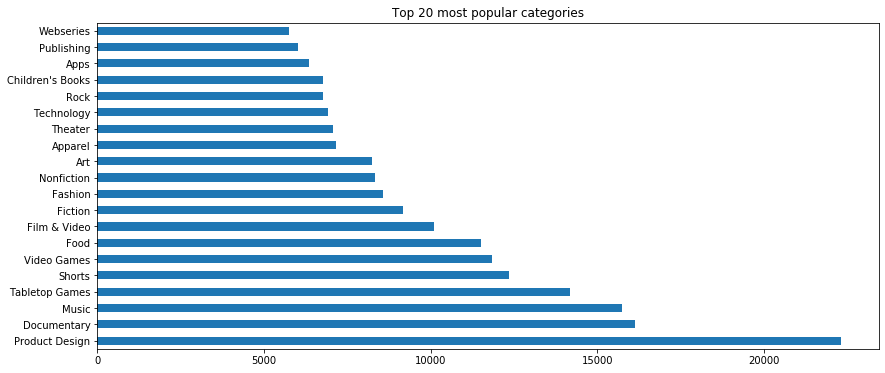

In [386]:
print('Categories in category: ', starts_2['category'].nunique())
starts_2['category'].value_counts()[:20].plot(kind='barh', 
                                        figsize=(14,6), 
                                        title='Top 20 most popular categories')

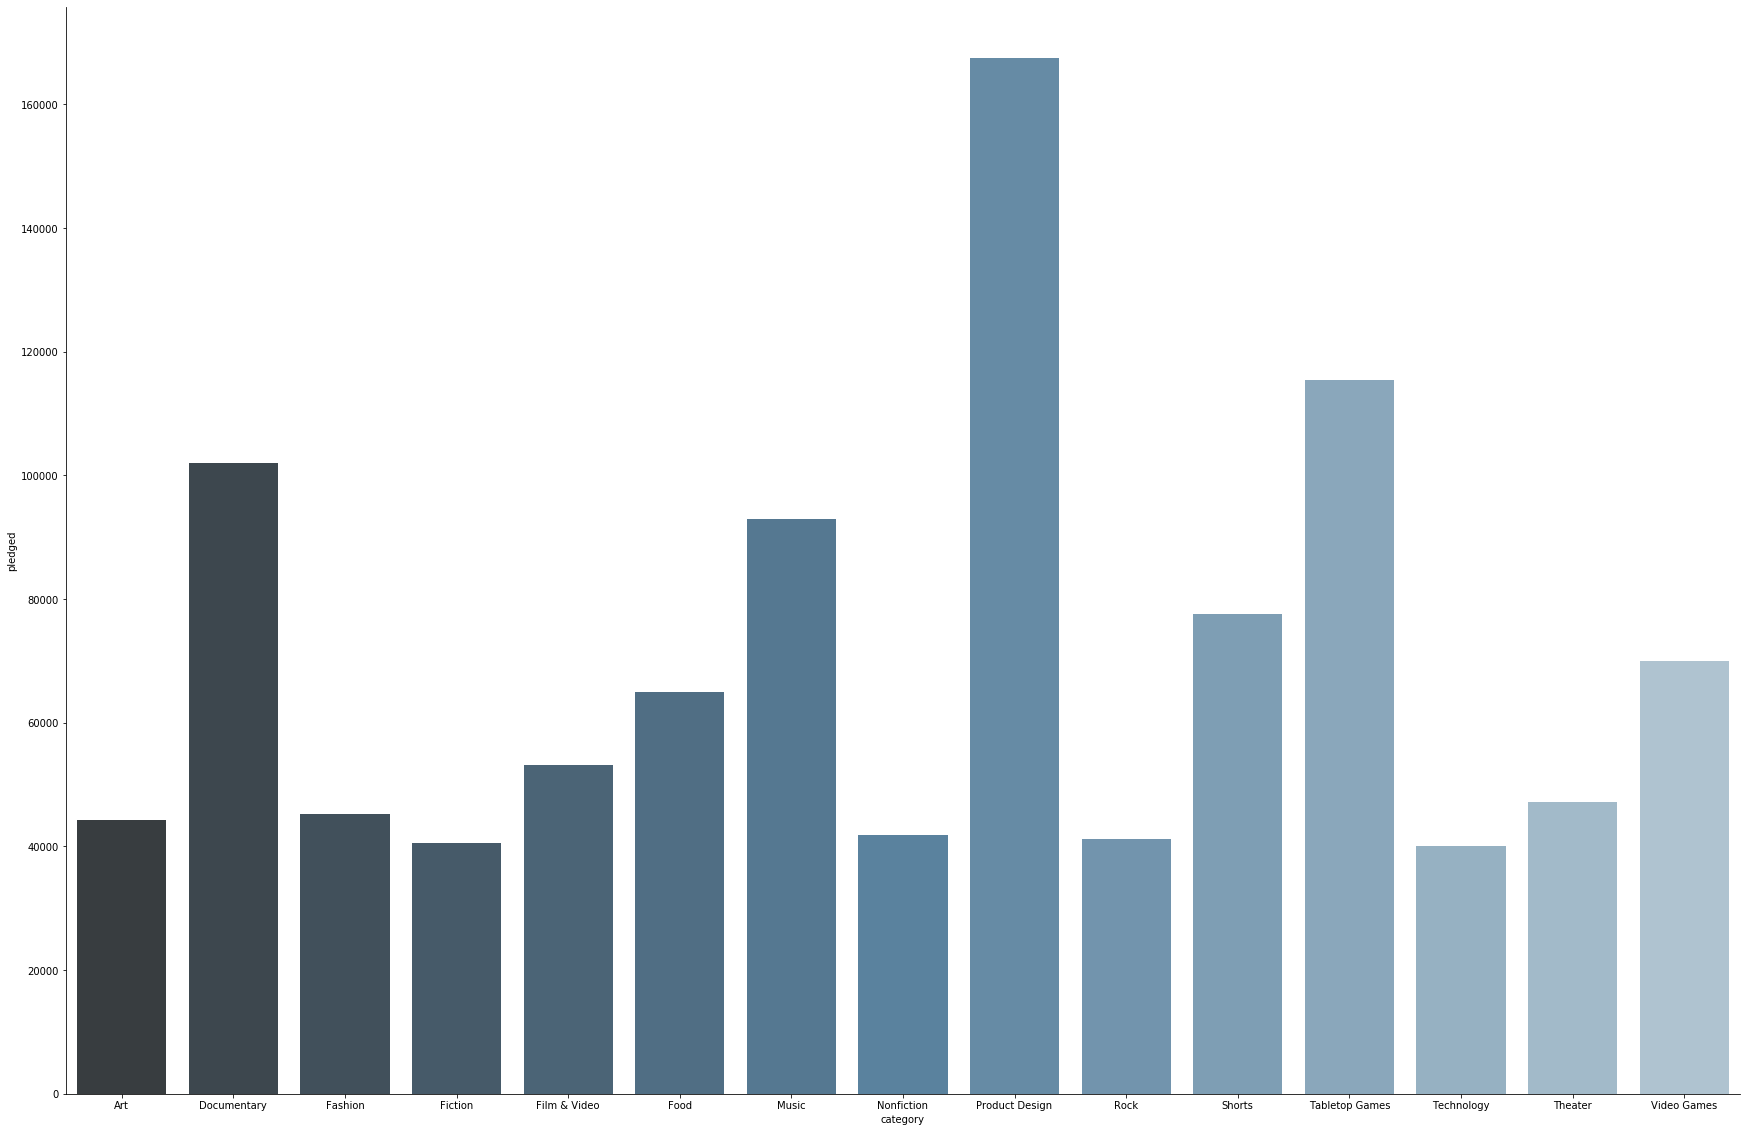

In [63]:
#In which category did investors mostly donate?
df=pd.DataFrame(starts_2.groupby('category')['pledged'].sum())
df=df.reset_index()
df

df2=pd.DataFrame()
df2= df[df.pledged>=40000]
df2.head()
df2.reset_index()
df2
plt.figure(figsize=(30,20))
sns.barplot(df2['category'], y= df2['pledged'],
            palette="Blues_d", saturation = 0.5)
sns.despine(right = True, top = True)

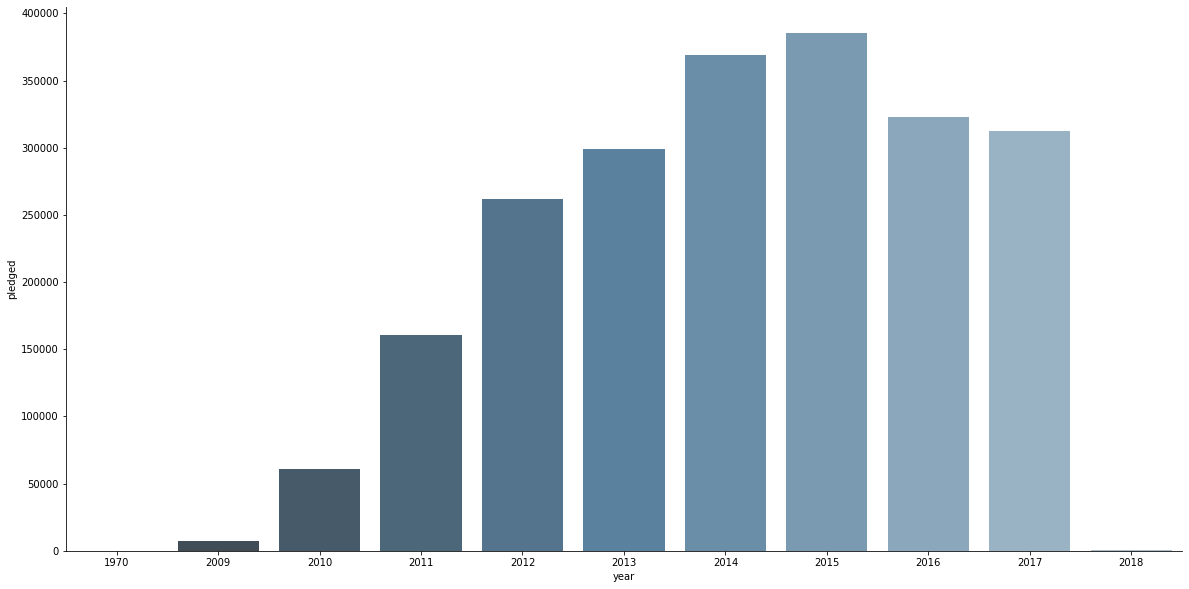

In [64]:
# In which year did investors invest the most?
df=pd.DataFrame(starts_2.groupby("year")["pledged"].sum(),columns=['pledged'])
df=df.reset_index()
df
plt.figure(figsize=(20,10))
sns.barplot(df['year'], y= df['pledged'] ,
            palette="Blues_d", saturation = 0.5)
sns.despine(right = True, top = True)

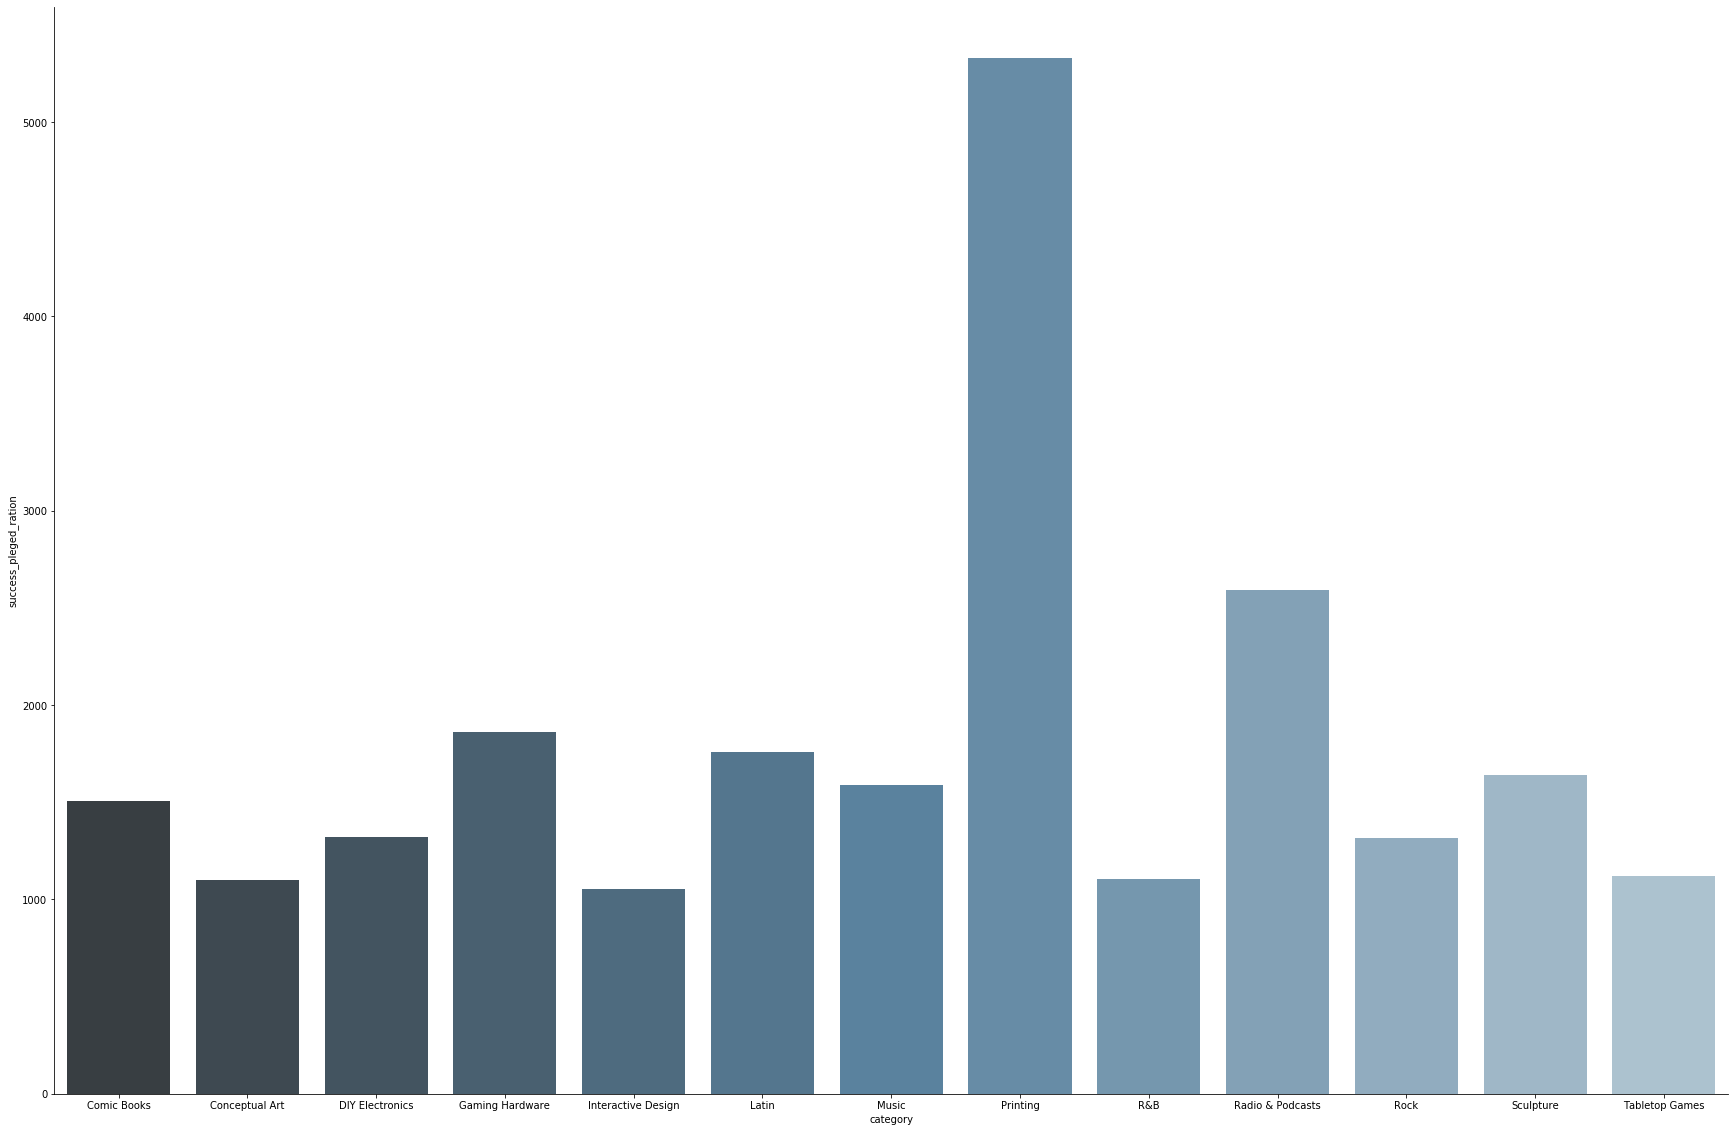

In [65]:
#Which category has been the most successful?
df=pd.DataFrame(starts_2.groupby('category')['success_pleged_ration'].mean())
df=df.reset_index()
df

df2=pd.DataFrame()
df2= df[df.success_pleged_ration>=1000]
df2.head()
df2.reset_index()
df2


plt.figure(figsize=(30,20))
sns.barplot(df2['category'], y= df2['success_pleged_ration'],
            palette="Blues_d", saturation = 0.5)
sns.despine(right = True, top = True)


In [67]:
# Which year has the most successful enterprise?
adet_tablosu = pd.crosstab(starts_2["year"], starts_2["state"])
adet_tablosu

state,canceled,failed,live,successful,suspended,undefined
year,,,,,,
1970,6,0,0,0,1,0
2009,150,600,0,579,0,0
2010,926,4984,0,4593,16,0
2011,2144,11878,0,12171,44,0
2012,2631,20588,0,17892,52,2
2013,3690,21686,0,19415,58,2
2014,7418,38199,0,21107,270,751
2015,8927,44301,0,20971,721,2380
2016,7119,30526,2,18766,344,427


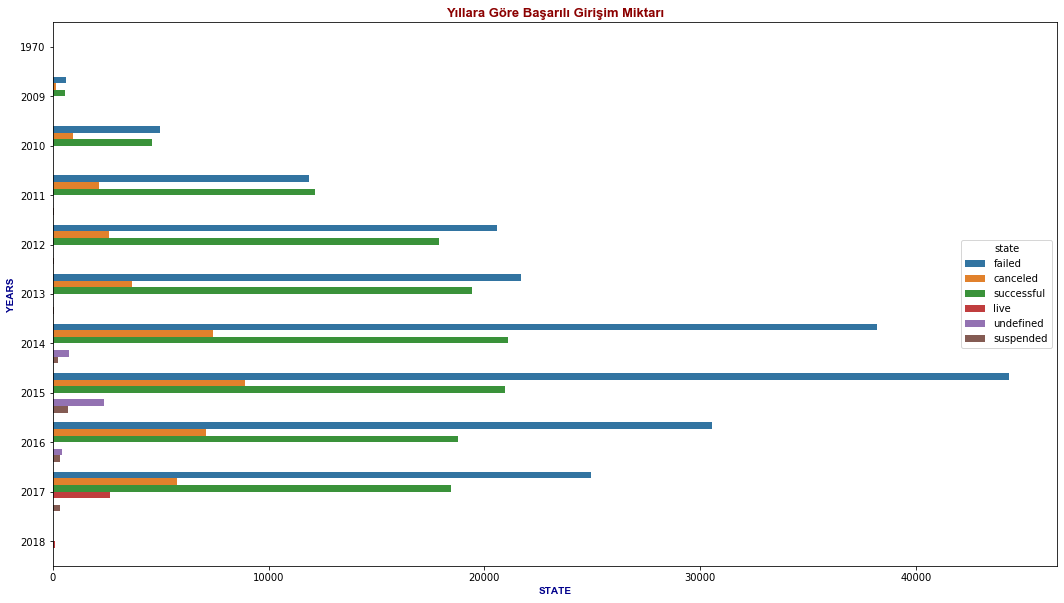

In [69]:
#Which year has the most successful enterprise?

plt.figure(figsize=(18,10))
sns.countplot(y="year", hue="state", data=starts_2)
plt.title("Yıllara Göre Başarılı Girişim Miktarı", fontdict = title_font)
plt.ylabel("YEARS", fontdict = curve_font)
plt.xlabel("STATE", fontdict = curve_font)
plt.show()

In [253]:
#starts_2['success_pleged_ration']= (starts['pledged']*100)/starts['goal']

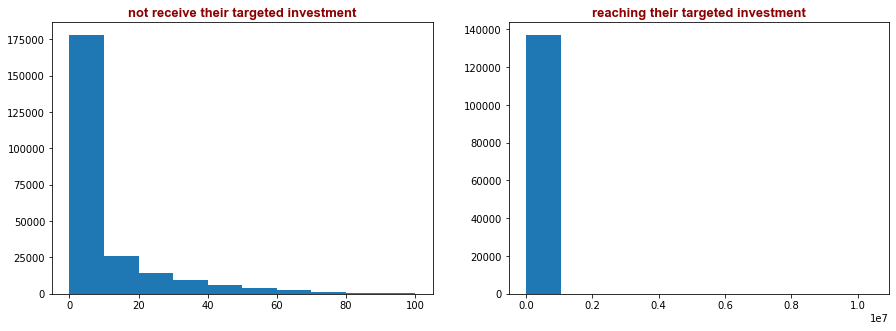

In [72]:
#How many of the startup have received the investment they targeted
df=pd.DataFrame()
df= starts_2[starts_2.success_pleged_ration<100]
df=df.reset_index()
df

df2=pd.DataFrame()
df2= starts_2[starts_2.success_pleged_ration>=100]
df2.head()
df2.reset_index()
df2

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(df['success_pleged_ration'])
plt.title("not receive their targeted investment",fontdict=title_font)
plt.subplot(1,2,2)
plt.hist(df2['success_pleged_ration'])
plt.title("reaching their targeted investment",fontdict=title_font)
plt.show()

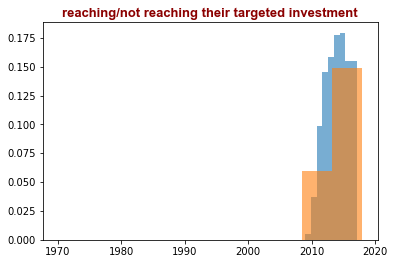

In [73]:
plt.hist(starts_2[starts_2["success_pleged_ration"]>=100].iloc[:,16], density=True, alpha=0.6)
plt.hist(starts_2[starts_2["success_pleged_ration"]<100].iloc[:,16], density=True, alpha=0.6)
plt.title('reaching/not reaching their targeted investment',fontdict=title_font)
plt.show()

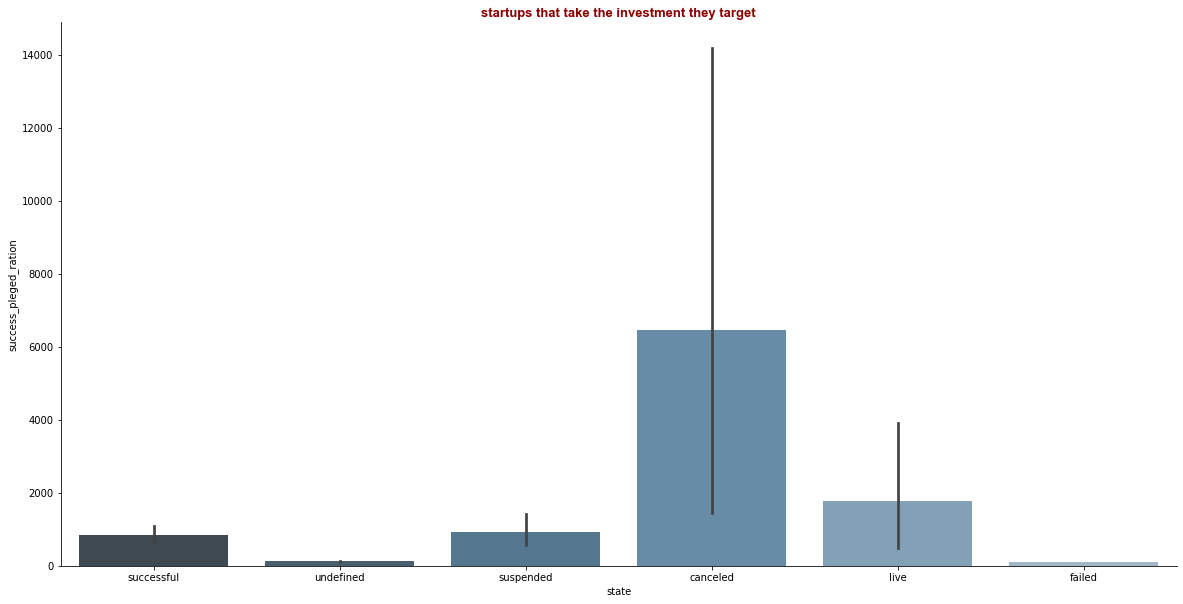

In [74]:
#How many ventures were successful despite collecting the money he had targeted?
df2=pd.DataFrame()
df2= starts_2[starts_2.success_pleged_ration>=100]
df2.reset_index()

plt.figure(figsize=(20,10))
sns.barplot(df2['state'], y= df2['success_pleged_ration'],
            palette="Blues_d", saturation = 0.5)
plt.title("startups that take the investment they target",fontdict=title_font)
sns.despine(right = True, top = True)

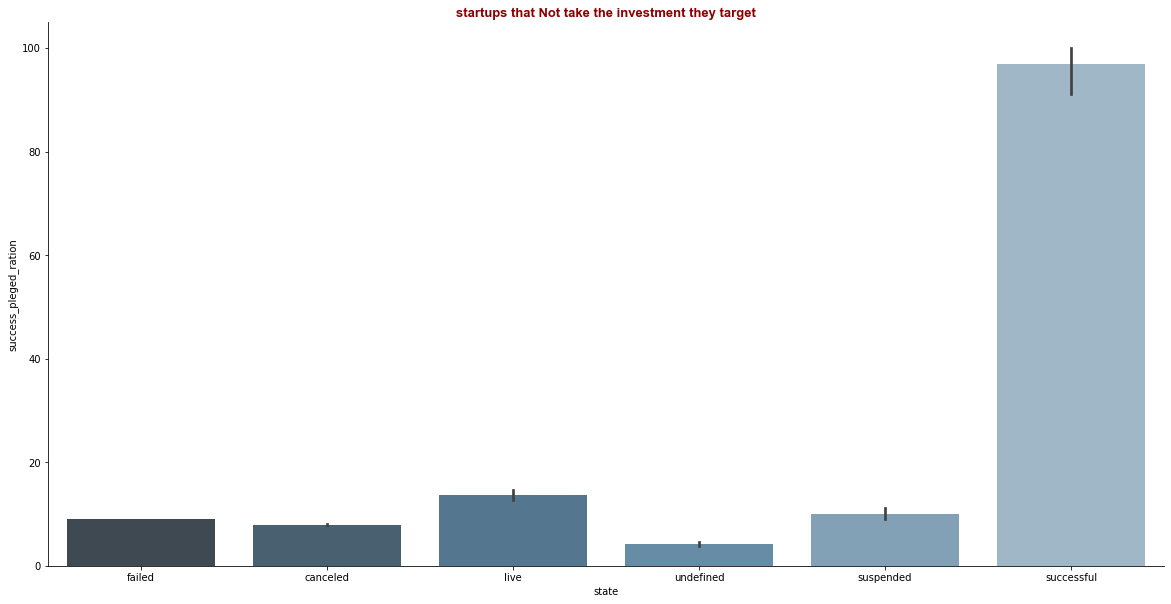

In [75]:
#How many ventures were successful despite collecting the money he had not targeted?

df=pd.DataFrame()
df= starts_2[starts_2.success_pleged_ration<100]
df=df.reset_index()

plt.figure(figsize=(20,10))
sns.barplot(df['state'], y= df['success_pleged_ration'],
            palette="Blues_d", saturation = 0.5)
plt.title("startups that Not take the investment they target",fontdict=title_font)
sns.despine(right = True, top = True)


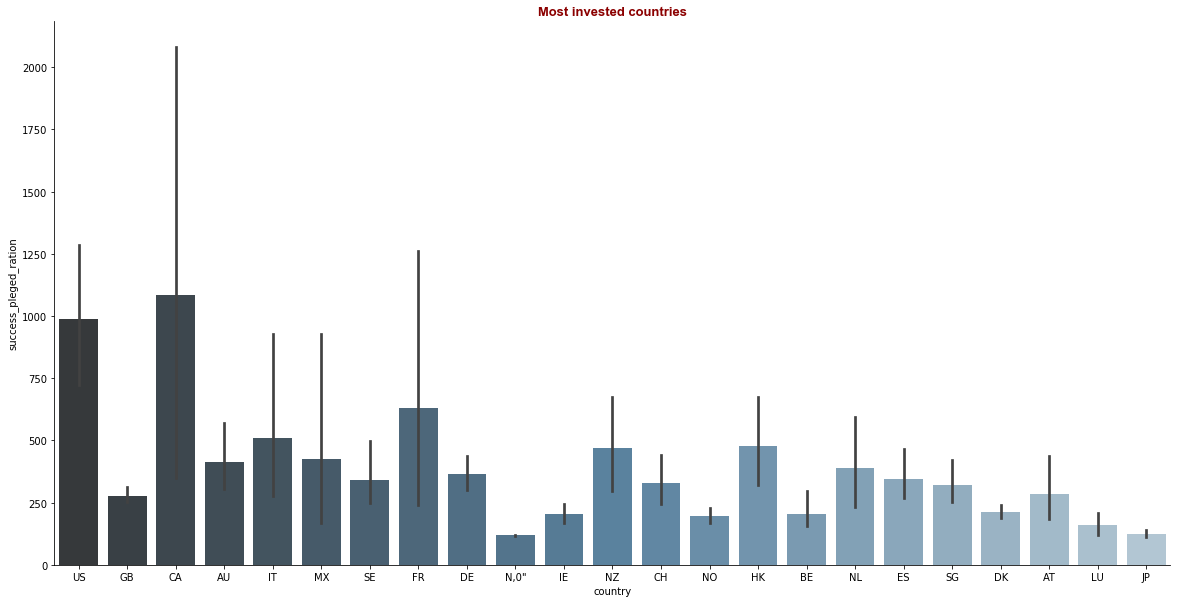

In [77]:
#which country has reached its targeted investment?

df2=pd.DataFrame()
df2= starts_2[starts_2.success_pleged_ration>=100]
df2.reset_index()

plt.figure(figsize=(20,10))
sns.barplot(df2['country'], y= df2['success_pleged_ration'],
            palette="Blues_d", saturation = 0.5)
plt.title("Most invested countries",fontdict=title_font)
sns.despine(right = True, top = True)

In [81]:
# t-test
country = df2["country"].unique()
grup_country = df2.groupby("country")

In [82]:
import scipy.stats as stats
#pd.options.display.float_format = '{:.15f}'.format
for var in ["success_pleged_ration"]:
    karsilastirma = pd.DataFrame(columns=['grup_1', 'grup_2','istatistik', 'p_degeri'])
    print("{} için karşılaştırma".format(var),end='')
    for i in range(0, len(country)):
        for j in range(i+1, len(country)):
            ttest = stats.ttest_ind(df2[df2["country"]==country[i]][var], 
                                df2[df2["country"]==country[j]][var])
            grup_1 = country[i]
            grup_2 = country[j]
            istatistik = ttest[0]
            p_degeri = ttest[1]
            
            karsilastirma = karsilastirma.append({"grup_1" : grup_1 ,
                                                  "grup_2" : grup_2 ,
                                                  "istatistik": istatistik , 
                                                  "p_degeri" : p_degeri}, ignore_index=True)
    display(karsilastirma)

success_pleged_ration için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,US,GB,1.59378,0.11099
1,US,CA,-0.12791,0.89822
2,US,AU,0.53135,0.59518
3,US,IT,0.20867,0.83471
4,US,MX,0.23159,0.81685
...,...,...,...,...
248,DK,LU,0.83354,0.40505
249,DK,JP,0.83824,0.40242
250,AT,LU,0.78040,0.43657
251,AT,JP,0.60335,0.54744


Text(0.5, 1, 'According to countries ; Success/Fail')

<Figure size 1440x1080 with 0 Axes>

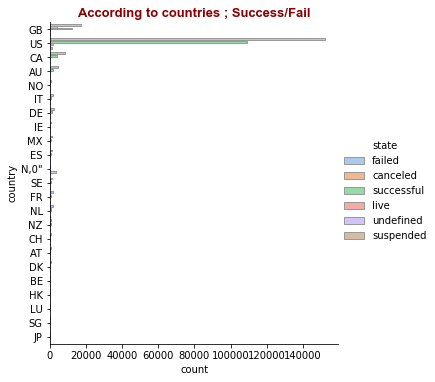

In [83]:
#which countries have been successful?
plt.figure(figsize=(20,15))
sns.catplot(y="country", hue="state", kind="count",
            palette="pastel", edgecolor=".6",
            data=starts_2)
plt.title("According to countries ; Success/Fail", fontdict = title_font)
